In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import interpolate

sns.set_style("whitegrid")

In [2]:
def label_to_title(label):
    tmp = label.split("_")
    ans = ""
    for i in range(len(tmp)):
        tmp_ = tmp[i].title()
        ans += tmp_ + " "
    return ans[:-1]
    
label_to_title("average_score")

'Average Score'

In [53]:
def plot_results(dir_name_list, label_list, title=None, n_exp=5, fontsize=28, ticksize=20, pop_sizes=[500], max_index=None, yscale="linear", xscale="linear", filename=None):
    
    key_list = ["total_steps", "best_score"]
    
    # loading dataframe
    stats = {}
    for dir_name in dir_name_list:
        
        stats[dir_name] = {}
        for key in key_list:
            stats[dir_name][key] = []

        for file in os.listdir(dir_name):
            
            if not file.endswith('log.pkl'):
                continue
                
            df = pd.read_pickle(dir_name + file)
            for key in key_list:
                try:
                    tmp = df[key].tolist()
                    stats[dir_name][key].append(tmp)
                except:
                    print("key not in df")
                    return
                
    
    n = len(key_list)
    cpt=0
    sns.set_palette("gnuplot", len(dir_name_list))   
        
    """
    Display the graph of the corresponding measure
    """

    plt.figure(figsize=(15, 8))
    plt.title(title, fontsize=fontsize)
    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    plt.tick_params(axis='both', which='minor', labelsize=ticksize)
    
    plt.xlabel("Number of steps", fontsize=fontsize)
    plt.ylabel(label_to_title(key), fontsize=fontsize)
    plt.yscale(yscale)
    plt.xscale(xscale)

    cpt_ = 0
    for dir_name in dir_name_list:

        sns.set_palette("gnuplot", 2)                

        absc = np.array(stats[dir_name]["total_steps"])
        score = np.array(stats[dir_name]["best_score"])
        data = [(x, y) for x, y in zip(absc, score)]

        # This is the minimum and maximum from all the datapoints.
        xmin = min(np.min(line[0]) for line in data)
        xmax = max(np.max(line[0]) for line in data)

        #100 points evenly spaced along the x axis
        x_points = np.linspace(xmin, xmax)

        #interpolate your values to the evenly spaced points.
        interpolated = [np.interp(x_points, d[0], d[1]) for d in data]

        #Now do the averaging.
        mean = [np.mean(x) for x in zip(*interpolated)]
        median = [np.median(x) for x in zip(*interpolated)]
        std = [np.std(x) for x in zip(*interpolated)]

        plt.plot(x_points, mean, label=label_list[0], linewidth=2.0, color=sns.color_palette()[0])
        plt.fill_between(x_points, mean-std/np.sqrt(n_exp), mean+std/np.sqrt(n_exp), alpha=0.2)
        plt.plot(x_points, median, linestyle='-.', linewidth=2.0, color=sns.color_palette()[0])

    legend = plt.legend(fontsize=fontsize)
    for legobj in legend.legendHandles:
        legobj.set_linewidth(3.0) 

    if filename is not None:
        plt.savefig(key + "_" + filename, bbox_inches='tight', pad_inches=0)
    plt.show()

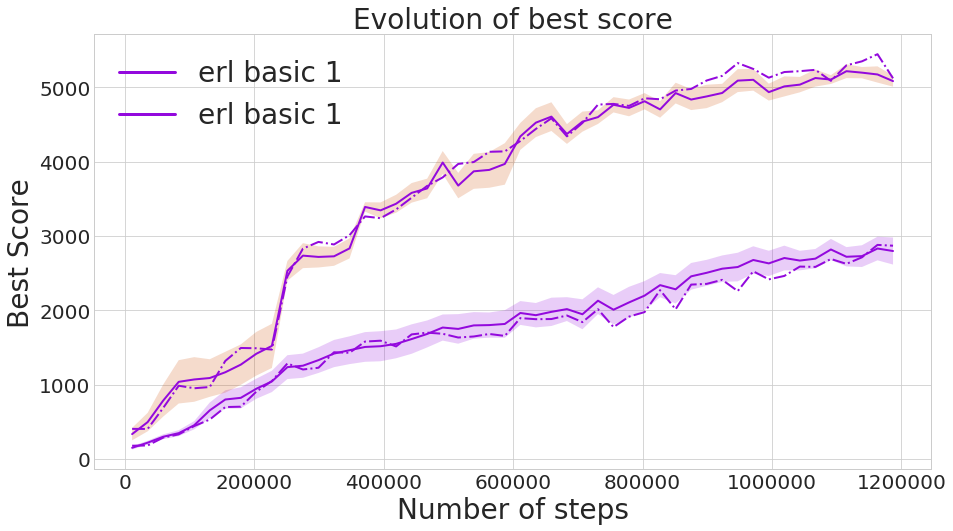

In [55]:
dir_name_list = [
        "hc_exp_0/",
        "hc_exp_1/"
]

label_list = ["erl basic 1", "erl basic 5"]
plot_results(dir_name_list, label_list, n_exp=10, yscale="linear", title="Evolution of best score")